# Tutorial 04 - Edges
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/schedldave/cv2021/blob/main/04_Edges.ipynb)
## Dr. David C. Schedl

Note: this tutorial is geared towards students **experienced in programming** and aims to introduce you to **Computer Vision** techniques.


Useful links:
* OpenCV Tutorials: https://docs.opencv.org/master/d9/df8/tutorial_root.html
* Image Processing in Pyhton: https://github.com/xn2333/OpenCV/blob/master/Seminar_Image_Processing_in_Python.ipynb



# Contents

This notebook covers topics such as Filters, Fourier Transformation and Interpolation

Table of Contents  
- [Filters in OpenCV](#Filters)
    - Average Filter
    - Gaussian Filter
    - Border Handling
- [Fourier Transformation](#Fourier_Spectrum)
    - FFT of Images
    - Inverse FFT
    - Convolution Theorem

# Initilization

As always let's import useful libraries, first.

In [4]:
import os
import cv2 # openCV
import numpy as np
import matplotlib.pyplot as plt

We will work with images today. So let's download some with `curl` (the same sources as in `02_OpenCV.ipynb`).

In [9]:
!curl -o "cat.jpg" "https://placekitten.com/256/256"
!curl -o "gogh.jpg" "https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Vincent_van_Gogh_-_National_Gallery_of_Art.JPG/367px-Vincent_van_Gogh_-_National_Gallery_of_Art.JPG"
!curl -o "einstein.jpg" "https://www.cns.nyu.edu/~lcv/ssim/index_files/image003.jpg"
# !curl -o "woman.jpg" "https://live.staticflickr.com/8859/18045025168_3a1ffa6521_w_d.jpg"
!curl -o "woman.jpg" "https://live.staticflickr.com/8859/18045025168_3a1ffa6521_c_d.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10097    0 10097    0     0  15092      0 --:--:-- --:--:-- --:--:-- 15070
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84904  100 84904    0     0   600k      0 --:--:-- --:--:-- --:--:--  600k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16025  100 16025    0     0  75589      0 --:--:-- --:--:-- --:--:-- 75234
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 56921    0 56921    0     0   168k      0 --:--:-- --:--:-- --:--:--  168k


Let's define utility functions to display images, in Jupyter Notebooks. OpenCV's `imshow` does not work and matplotlib's `imshow` needs special treatment due to color channel handling (RGB vs. BGR)

In [11]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab.patches import cv2_imshow
else:
  print('Not running on CoLab')
  def cv2_imshow(img):
      """A replacement for cv2.imshow() for use in Jupyter notebooks.

        Args:
          img : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color
            image.
      """
      cv2.imshow('image', img)
      cv2.waitKey(0)
      cv2.destroyAllWindows()

def imshow(image, *args, **kwargs):
    """A replacement for cv2.imshow() for use in Jupyter notebooks using matplotlib.

        Args:
          image : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. 
    """
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion  
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Draw the image
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually an image
    plt.axis('off')
    # Make sure it outputs
    # plt.show()

Running on CoLab


# Practice with linear filters

Image filters in OpenCV are applied with `cv2.filter2D(img,-1,kernel)`, where the image and the kernel are numpy arrays.


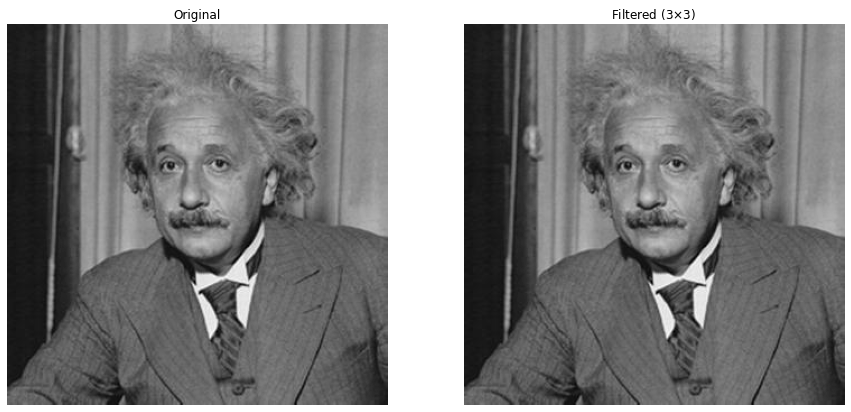

In [12]:
img = cv2.imread('einstein.jpg')[:,:,1].astype(np.float32)

# define your costum kernel below
kernel = np.array([[0,0,0],
                   [0,1,0],
                   [0,0,0]])
dst = cv2.filter2D(img,-1,kernel)

plt.figure(figsize=(15,10)) # this command makes the figure larger so we see the filter results clearer
plt.subplot(121),imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(122),imshow((dst), cmap='gray'),plt.title(r'Filtered ({}$\times${})'.format(*kernel.shape[:2]))
plt.show()

# Canny Edge Detection

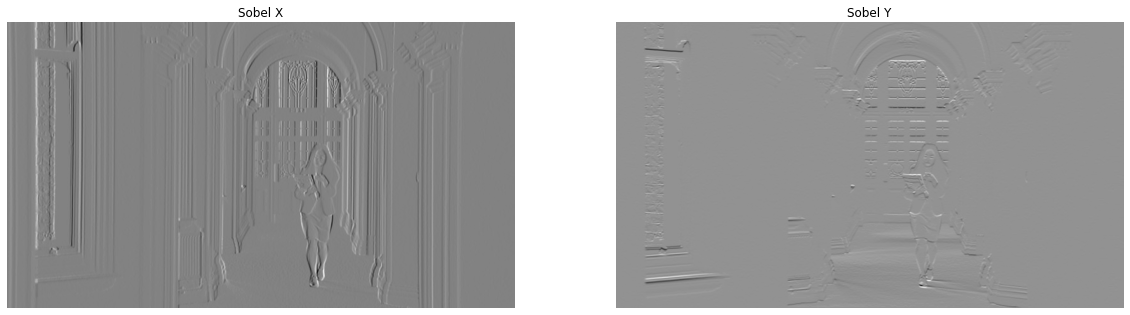

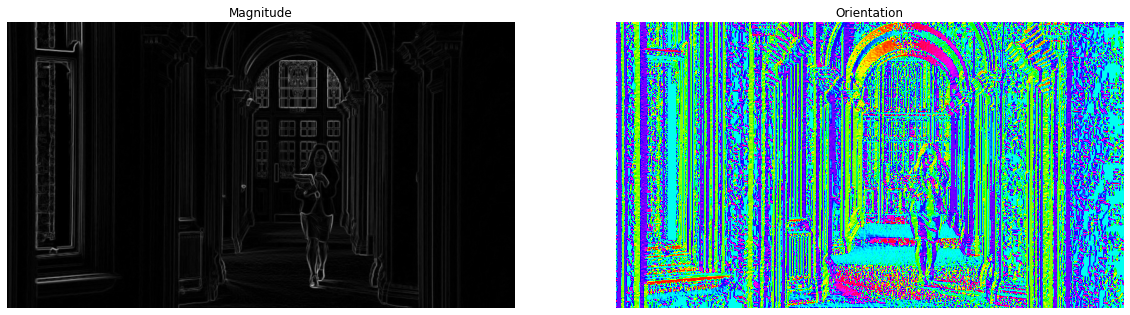

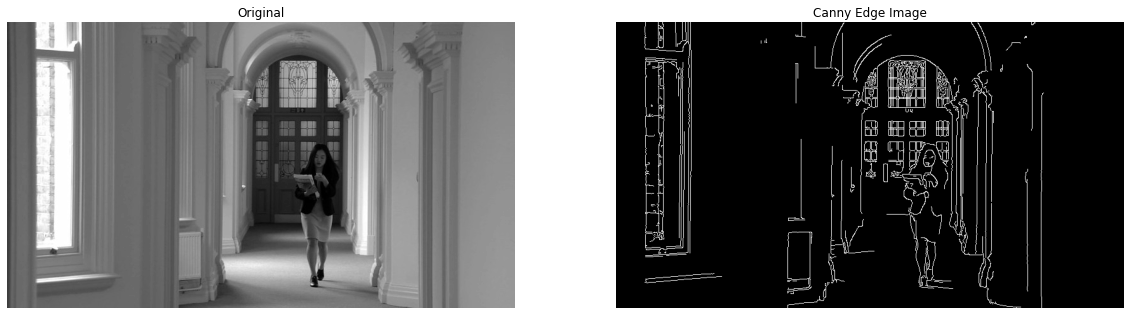

In [13]:
img = cv2.imread('woman.jpg',0)

gsize = (15,15)
#img = cv2.GaussianBlur(img, gsize, 3)

ksize = 3
#edges = cv2.Canny(img,100,200,apertureSize=ksize)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=ksize)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=ksize)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1),imshow(sobelx,cmap = 'gray'), plt.title('Sobel X')
plt.subplot(1,2,2),imshow(sobely,cmap = 'gray'), plt.title('Sobel Y')
plt.show()

mag = np.sqrt( sobelx**2 + sobely**2 )
theta = np.arctan2(sobelx, sobely)

plt.figure(figsize=(20,10)) # this command makes the figure larger so we see the filter results clearer
plt.subplot(121),imshow(mag,cmap = 'gray'), plt.title('Magnitude')
plt.subplot(122), imshow(theta,cmap='hsv'), plt.title('Orientation')
plt.show()

edges = cv2.Canny(sobelx.astype(np.int16), sobely.astype(np.int16), 0.1*np.amax(mag),0.2*np.amax(mag))

plt.figure(figsize=(20,10)) # this command makes the figure larger so we see the filter results clearer
plt.subplot(121),imshow(img,cmap = 'gray'), plt.title('Original')
plt.subplot(122), imshow(edges,cmap = 'gray'), plt.title('Canny Edge Image')
plt.show()

# Hough Transformation

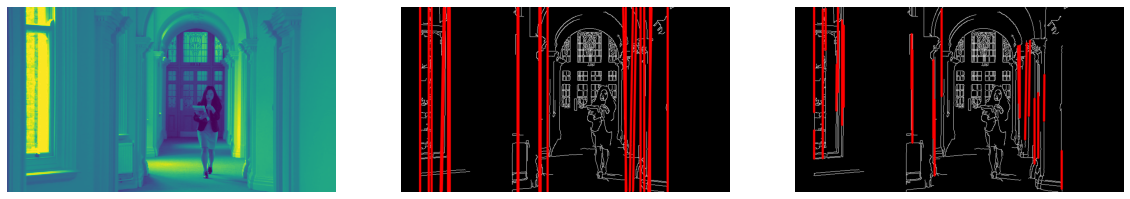

In [33]:
import sys
import math
import cv2 as cv
import numpy as np

default_file = 'sudoku.png'
filename = default_file
# Loads an image
src = cv.imread("woman.jpg", cv.IMREAD_GRAYSCALE)
# Check if image is loaded fine
if src is None:
    print ('Error opening image!')
    print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')


dst = cv.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, np.pi )

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)


linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 150, None, 40, 20)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

plt.figure(figsize=(20,10))
plt.subplot(131), imshow(src)
plt.subplot(132),imshow(cdst) #"Detected Lines (in red) - Standard Hough Line Transform", 
plt.subplot(133),imshow(cdstP) #"Detected Lines (in red) - Probabilistic Line Transform",
plt.show()


In [27]:
help( cv.HoughLinesP)

Help on built-in function HoughLinesP:

HoughLinesP(...)
    HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]) -> lines
    .   @brief Finds line segments in a binary image using the probabilistic Hough transform.
    .   
    .   The function implements the probabilistic Hough transform algorithm for line detection, described
    .   in @cite Matas00
    .   
    .   See the line detection example below:
    .   @include snippets/imgproc_HoughLinesP.cpp
    .   This is a sample picture the function parameters have been tuned for:
    .   
    .   ![image](pics/building.jpg)
    .   
    .   And this is the output of the above program in case of the probabilistic Hough transform:
    .   
    .   ![image](pics/houghp.png)
    .   
    .   @param image 8-bit, single-channel binary source image. The image may be modified by the function.
    .   @param lines Output vector of lines. Each line is represented by a 4-element vector
    .   \f$(x_1, y_1, x_2, y